Data augmentation helps generate more data - this can be used to avoid overfitting by generating new data from the alterations

- Flipping image
- rotating image
- zooming in/out
- cropping image
- varying the color

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [3]:
def plotImages(images_arr): #tensorflow function to plot images in grid
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [7]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1,
       shear_range=0.15, zoom_range=0.1, channel_shift_range=10., horizontal_flip=True)

In [8]:
chosen_image = random.choice(os.listdir('data/dogs-vs-cats/train/dog'))
image_path = 'data/dogs-vs-cats/train/dog/'+ chosen_image

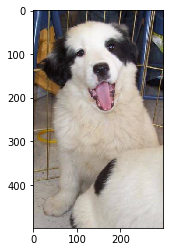

In [9]:
#obtain image
image = np.expand_dims(plt.imread(image_path),0)
plt.imshow(image[0])

In [17]:
#create path to save the augmented images in
if os.path.isdir('data/dogs-vs-cats/augmented/')is False :
    os.mkdir('data/dogs-vs-cats/augmented/')

save_here = 'data/dogs-vs-cats/augmented/'

for x, val in zip(gen.flow(image,                    #image we chose
        save_to_dir=save_here,     #this is where we figure out where to save
         save_prefix='aug',        # it will save the images as 'aug_0912' some number for every new augmented image
        save_format='png'),range(10)) :     # here we define a range because we want 10 augmented images otherwise it will keep looping forever I think
    pass
    
#generate batches of augmented images from this image
#aug_iter = gen.flow(image)

In [18]:
# get 10 samples of augmented images
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

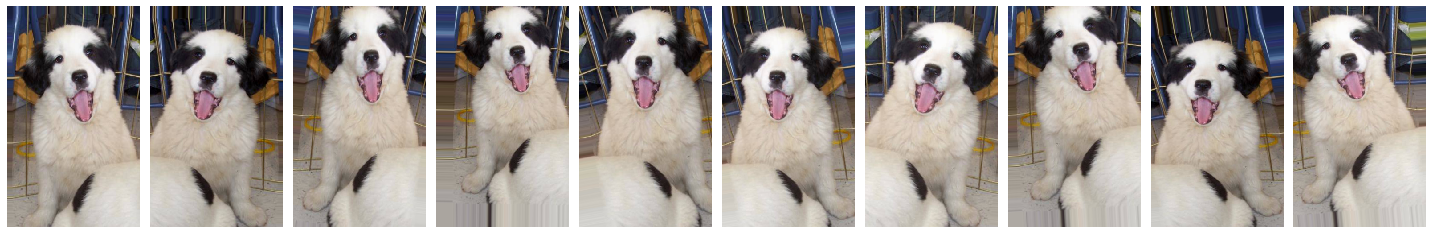

In [19]:
plotImages(aug_images)